In [1]:
import numpy as np 
import pandas as pd 

In [ ]:
#set up TPU config

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

In [2]:
train = pd.read_csv('jigsaw-toxic-comment-train.csv')

In [27]:
validation = pd.read_csv('validation.csv')
test = pd.read_csv('test.csv')

In [4]:
train.drop(['severe_toxic','obscene','threat','insult','identity_hate'],axis=1,inplace=True)

In [11]:
import collections
import matplotlib.pyplot as plt
l = [len(str(x).split()) for x in list(train.comment_text)]
w = collections.Counter(l)
plt.bar(w.keys(), w.values())

<BarContainer object of 975 artists>

(0, 1000)

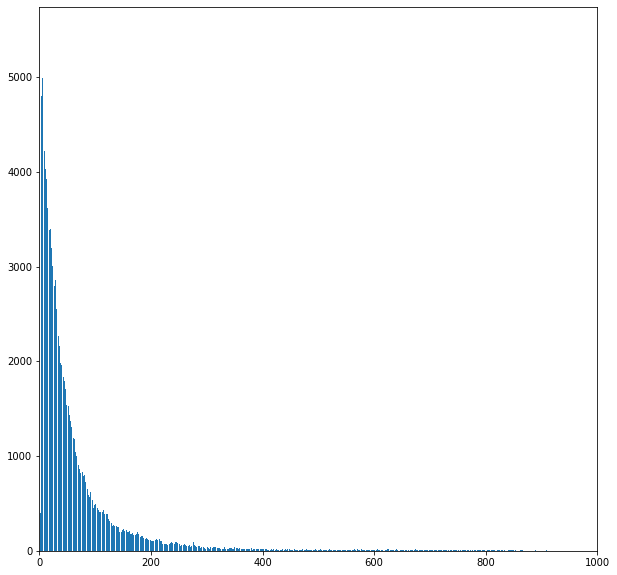

In [24]:
plt.figure(figsize=(10,10))

plt.bar(w.keys(), w.values())
plt.xlim([0, 1000])

In [13]:
max(l)

2321

In [26]:
collections.Counter(train.toxic)

Counter({0: 202165, 1: 21384})

In [28]:
collections.Counter(test.lang)

Counter({'tr': 14000,
         'ru': 10948,
         'it': 8494,
         'fr': 10920,
         'pt': 11012,
         'es': 8438})